1. Implement the program and explain the results.

a. Use forward Euler method to solve the following problem $y' = -5 y, \quad y(0)=1.$\
Solve the problem for $t \in [0, 10]$ with $h = 0.4$, $h = 0.41$ and $h = 0.1$.

Note：
> The forward Euler method $u_{n+1} = u_n + h\lambda u_n = (1+h\lambda)u_n \quad$

According to the question, we set $\lambda = -5$.

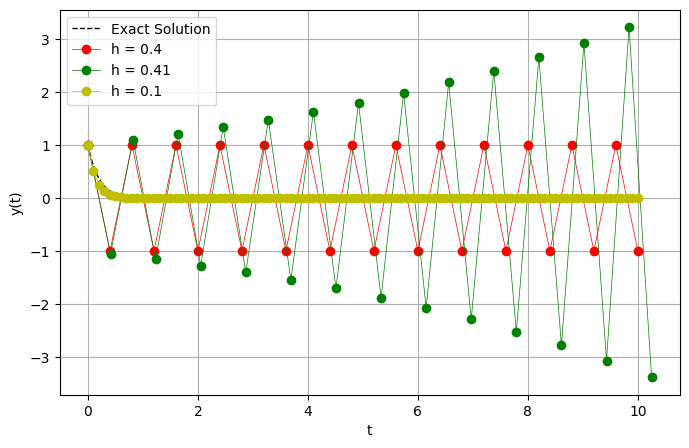

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lam = -5       # λ = -5
y0 = 1.0       # initial condition
t0, t_end = 0, 10

# Forward Euler function
def forward_euler(lam, y0, h, t0, t_end):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(len(t) - 1):
        y[n+1] = (1 + h * lam) * y[n]
    return t, y

# Exact solution
def exact_solution(t):
    return np.exp(lam * t)

# Different h
hs = [0.4, 0.41, 0.1]
colors = ['r', 'g', 'y']

# Plot
plt.figure(figsize=(8,5))
t_exact = np.linspace(t0, t_end, 1000)
plt.plot(t_exact, exact_solution(t_exact), 'k--', label='Exact Solution',linewidth=1.0)

for h, c in zip(hs, colors):
    t, y = forward_euler(lam, y0, h, t0, t_end)
    plt.plot(t, y, c+'o-', label=f'h = {h}',linewidth=0.5)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


b. Use backward Euler method to solve the following problem $y' = -5 y, \quad y(0)=1.$\
Solve the problem for $t \in [0, 10]$ with $h = 0.4$, $h = 0.41$ and $h = 0.1$.

Note ：
> The backward Euler method $u_{n+1} = u_n + h\lambda u_{n+1} \quad$

In here, we set $\lambda = -5$.

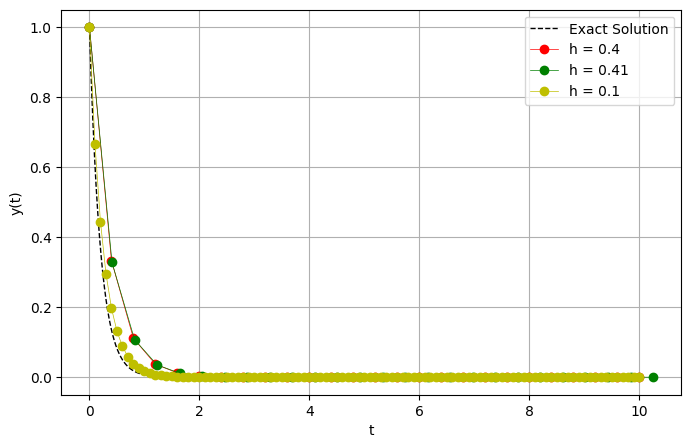

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lam = -5       # λ = -5
y0 = 1.0
t0, t_end = 0, 10

# Backward Euler function
def backward_euler(lam, y0, h, t0, t_end):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(len(t) - 1):
        y[n+1] = y[n] / (1 - h * lam)
    return t, y

# Exact solution
def exact_solution(t):
    return np.exp(lam * t)

# Different h
hs = [0.4, 0.41, 0.1]
colors = ['r', 'g', 'y']

# Plot
plt.figure(figsize=(8,5))
t_exact = np.linspace(t0, t_end, 1000)
plt.plot(t_exact, exact_solution(t_exact), 'k--', label='Exact Solution',linewidth=1.0)

for h, c in zip(hs, colors):
    t, y = backward_euler(lam, y0, h, t0, t_end)
    plt.plot(t, y, c+'o-', label=f'h = {h}',linewidth=0.5)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


2. Consider solving the following problem using forward Euler method\
$y' = y(1-y), \quad y(0)=y_0, \quad 0 < y_0 < 1. $\
Find the range of h such that the solution is qualitatively correct.

> The forward Euler method $u_{n+1} = u_n + h\lambda u_n = (1+h\lambda)u_n $.

Consider $ u_{n+1} = u_n + h(1-u_n) u_n = u_n [1+h(1-u_n)]$\
Since the the stability requirement of the Forward Euler method is $|1+h\lambda|< 1$ , then $ |1-h|< 1$ if we set y = 1\
which means $0 < h < 2$

In [41]:
import numpy as np

def f(t, y):
    return y * (1 - y)

def forward_euler(f, y0, t0, t_end, h):
    N = int((t_end - t0) / h)
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + h * f(t0 + n*h, y[n])
    return y

# 設定參數
y0 = 0.2
t0, t_end = 0, 20

def is_qualitatively_correct(y):
    return (np.all(y > 0) and np.all(y < 1.5)
            and y[-1] > 0.99*y[-2])

# 掃描 h 範圍
hs = np.linspace(0.05, 3, 200)
valid_h = []

for h in hs:
    y = forward_euler(f, y0, t0, t_end, h)
    if is_qualitatively_correct(y):
        valid_h.append(h)

if valid_h:
    print(f"Qualitatively correct range of h: {min(valid_h):.3f} < h < {max(valid_h):.3f}")
else:
    print("There is no such h.")


Qualitatively correct range of h: 0.050 < h < 3.000
